In [ ]:
pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
from PIL import Image
from sklearn.preprocessing import StandardScaler
from keras.preprocessing import image

ModuleNotFoundError: No module named 'tensorflow'

Dataset feeding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/COVID-19 Dataset/X-ray')

import shutil

# Specify the source directory in Google Drive
source_directory = '/content/drive/My Drive/COVID-19 Dataset'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# source_directory = '/content/COVID-19-Dataset/X-ray'  # Update to your dataset path

# # Create a backup directory to move truncated images
# backup_directory = '/content/truncated_images'  # You can change this path

# # Create the backup directory if it doesn't exist
# os.makedirs(backup_directory, exist_ok=True)

# for filename in os.listdir(source_directory):
#     file_path = os.path.join(source_directory, filename)

#     try:
#         # Attempt to open the image with PIL
#         img = Image.open(file_path)
#         img.verify()  # Check for image file truncation
#         img.close()
#     except (IOError, SyntaxError):
#         # Handle the "image file is truncated" error
#         print(f"Truncated image: {filename}")
#         # Move the truncated image to the backup directory
#         os.rename(file_path, os.path.join(backup_directory, filename))


visuilazation

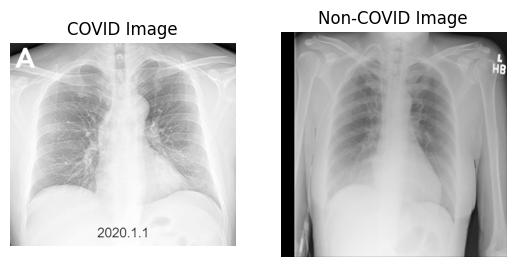

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the directory containing COVID and Non-COVID images
dataset_path = '//content/drive/MyDrive/COVID-19 Dataset/X-ray'

# Define paths to random COVID and Non-COVID images
covid_image_path = os.path.join(dataset_path, 'COVID', os.listdir(os.path.join(dataset_path, 'COVID'))[2])
non_covid_image_path = os.path.join(dataset_path, 'Non-COVID', os.listdir(os.path.join(dataset_path, 'Non-COVID'))[602])

# Load and display the COVID image in black and white
covid_image = Image.open(covid_image_path)
plt.subplot(1, 2, 1)
plt.title("COVID Image")
plt.imshow(covid_image, cmap='gray')
plt.axis('off')

# Load and display the Non-COVID image in color
non_covid_image = Image.open(non_covid_image_path)
plt.subplot(1, 2, 2)
plt.title("Non-COVID Image")
plt.imshow(non_covid_image, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:

# Continue with the rest of the code as previously provided

data preprocessing

In [ ]:
data = []
labels = []
covid_folder = os.path.join(dataset_path, 'COVID')
non_covid_folder = os.path.join(dataset_path, 'Non-COVID')

for filename in os.listdir(covid_folder):
    file_path = os.path.join(covid_folder, filename)
    data.append(file_path)
    labels.append(1)

# Load non-COVID-19 images and assign a label of 0
for filename in os.listdir(non_covid_folder):
    file_path = os.path.join(non_covid_folder, filename)
    data.append(file_path)
    labels.append(0)

In [ ]:
df = pd.DataFrame({'Data': data, 'Label': labels})
# Split the data into training and testing sets
X = df['Data']
y = df['Label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Continue with the rest of the code as previously provided

In [ ]:
num_samples_to_check = 10  # Adjust this number as needed

for i in range(num_samples_to_check):
    print(f"Data: {data[i]}")
    print(f"Label: {labels[i]}")
    print()

Data: //content/drive/MyDrive/COVID-19 Dataset/X-ray/COVID/aug_covid-19-pneumonia-15-PA_PL_3.jpg
Label: 1

Data: //content/drive/MyDrive/COVID-19 Dataset/X-ray/COVID/aug_ryct.2020200034.fig2._avg_1.jpg
Label: 1

Data: //content/drive/MyDrive/COVID-19 Dataset/X-ray/COVID/aug_nCoV-radiol.2020200269.fig1-day7._PL_4.jpg
Label: 1

Data: //content/drive/MyDrive/COVID-19 Dataset/X-ray/COVID/aug_lancet-case2b_sharp_1.jpg
Label: 1

Data: //content/drive/MyDrive/COVID-19 Dataset/X-ray/COVID/aug_41591_2020_819_Fig1_HTML.webp-day10_PL_4.jpg
Label: 1

Data: //content/drive/MyDrive/COVID-19 Dataset/X-ray/COVID/aug_figure1-5e75d0940b71e1b702629659-98-right._PL_1.jpg
Label: 1

Data: //content/drive/MyDrive/COVID-19 Dataset/X-ray/COVID/aug_ryct.2020200034.fig2._sharp_4.jpg
Label: 1

Data: //content/drive/MyDrive/COVID-19 Dataset/X-ray/COVID/aug_23E99E2E-447C-46E5-8EB2-D35D12473C39_PL_0.jpg
Label: 1

Data: //content/drive/MyDrive/COVID-19 Dataset/X-ray/COVID/aug_lancet-case2b_avg_1.jpg
Label: 1

Data: /

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# # Define image dimensions
# image_height = 150
# image_width = 150
# num_channels = 2
# # Create an ImageDataGenerator with preprocessing and augmentation options
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     shear_range=0.2,
#     zoom_range=0.2,
#     fill_mode='nearest'
# )




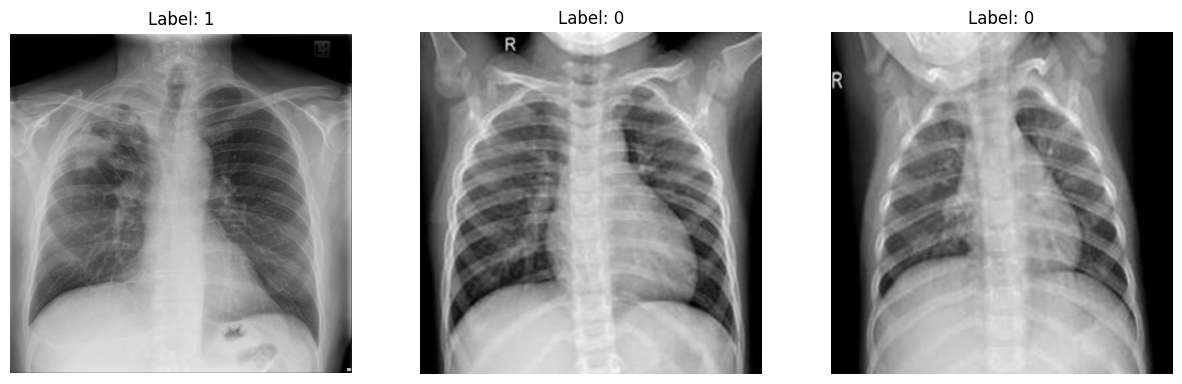

In [ ]:
import random

# # Use ImageDataGenerator with flow_from_dataframe
# train_generator = datagen.flow_from_dataframe(
#     df,
#     x_col='Data',
#     y_col='Label',
#     target_size=(image_height, image_width),
#     batch_size=30,  # Set the batch size to 30
#     class_mode='raw',
#     shuffle=True
# )

# # Get a batch of data and labels
# data, labels = train_generator.next()
data = np.array(data)
labels = np.array(labels)
# Choose 3 random image indices
random_indices = random.sample(range(data.shape[0]), 3)
image_directory = '/content/drive/MyDrive/COVID-19 Dataset/X-ray'

# Get the random image paths
random_image_paths = [data[i] for i in random_indices]

# Create a subplot with 1 row and 3 columns
plt.figure(figsize=(15, 5))
for i, random_image_path in enumerate(random_image_paths, 1):
    plt.subplot(1, 3, i)

    # Load and display the image
    image = cv2.imread(os.path.join(image_directory, random_image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)

    # You can access the label from the 'labels' array
    label = labels[random_indices[i - 1]]
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.show()

In [ ]:
import cv2
import numpy as np

# Ensure that the 'Data' column contains string paths
df['Data'] = df['Data'].astype(str)

# Define the number of channels (2 in your case)
num_channels = 2

# Create an empty array to store the images
X = np.empty((len(data), 150, 150, num_channels))

# Load and preprocess the images
for i in range(len(data)):
    image_path = df['Data'].iloc[i]  # Access the image path from the DataFrame
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
    X[i, :, :, 0] = img  # Store the image in the first channel
    X[i, :, :, 1] = img  # Store the same image in the second channel (as you mentioned 2 channels)

# X is now a NumPy array with shape (number_of_images, 150, 150, 2)

# Display the shape
print(X.shape)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

In [ ]:


import matplotlib.pyplot as plt

# Select an image from X_train
image_to_display = X_train[555][:, :, 0]  # Use the first channel for grayscale data

# Display the image using Matplotlib
plt.imshow(image_to_display, cmap='gray')
plt.axis('off')
plt.show()
y_train[555]

Model building and training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test loss: {loss:.4f}')
# print(f'Test accuracy: {accuracy:.4f}')
